# Recursive Feature Elimination

Recursive feature elimination (RFE) is a feature selection method that fits a model and removes the weakest feature (or features) until the specified number of features is reached.

### why feature selection is important

<li>Reducing the number of features is another way to prevent overfitting (similar to regularization).</li>
<li>For some models, fewer features can improve fitting time and/or results.</li>
<li>Identifying most critical features can improve model interpretability</li>

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.datasets import load_wine
from sklearn.feature_selection import RFE,RFECV
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR,SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

In [2]:
wine=load_wine()

In [3]:
data=np.c_[wine.data,wine.target]
columns=np.append(wine.feature_names,["target"])

In [4]:
dw=pd.DataFrame(data,columns=columns)

In [5]:
wine.data[170]

array([1.22e+01, 3.03e+00, 2.32e+00, 1.90e+01, 9.60e+01, 1.25e+00,
       4.90e-01, 4.00e-01, 7.30e-01, 5.50e+00, 6.60e-01, 1.83e+00,
       5.10e+02])

In [ ]:
x

In [6]:
x=dw[['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline']]
y=dw[['target']]

In [7]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=0)

In [8]:
svc_1=SVC(C=10)

In [9]:
svc_1.fit(xtrain,ytrain)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [10]:
y_pred=svc_1.predict(xtest)

In [11]:
accuracy_score(y_pred,ytest)

0.4444444444444444

In [12]:
log=LogisticRegression()
log.fit(xtrain,ytrain)
l_pred=log.predict(xtest)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [13]:
accuracy_score(l_pred,ytest)

0.9444444444444444

In [14]:
gbc=GradientBoostingClassifier(learning_rate=0.0001,max_features=1,subsample=0.7,n_estimators=5000)

In [28]:
gbc.fit(xtrain,ytrain)
g_pred=gbc.predict(xtest)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [16]:
accuracy_score(g_pred,ytest)

1.0

In [17]:
from sklearn.model_selection import cross_val_predict,cross_val_score,check_cv

In [18]:
cp=cross_val_predict(gbc,xtrain,ytrain)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y t

In [19]:
cross_val_score(gbc,xtrain,ytrain).mean()

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y t

0.9839147286821706

In [20]:
gt_pred=gbc.predict([t1])

NameError: name 't1' is not defined

In [ ]:
gt_pred

In [ ]:
dw[169:171]

In [46]:
rf=RFE(SVC(kernel='linear'),n_features_to_select=8)
rf.fit(xtrain,ytrain)
rf_pred=rf.predict(xtest)

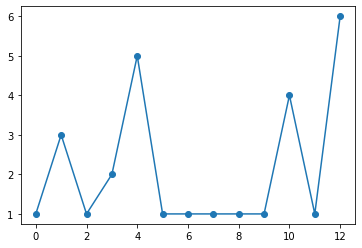

In [58]:
plt.plot(rf.ranking_,marker='o')

In [52]:
rf.support_

array([ True, False,  True, False, False,  True,  True,  True,  True,
        True, False,  True, False])